In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("garments_worker_productivity 2.csv")

In [4]:
# View the first few rows of the dataset
data.head ()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
# Convert columns to numeric if needed
columns_to_fix = ['team','targeted_productivity', 'smv', 'over_time', 'incentive','wip','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity']  # Example column names
for col in columns_to_fix:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
# Define numeric columns
numeric_columns = [
    'team', 'targeted_productivity', 'smv', 'over_time',
    'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
    'no_of_workers', 'actual_productivity'
]

# Drop rows where any numeric column has missing values
data_cleaned = data.dropna(subset=numeric_columns)

# Check the result
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
print(data_cleaned.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [8]:
# Get Summary Statistics from the Data
print(data_cleaned.describe())

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [10]:
# Step 1: Standardize both 'finishing' labels to 'finishing' by removing whitespace too
data_cleaned['department'] = data_cleaned['department'].str.strip().str.lower()

# Step 2: Remove the invalid row where 'department' column contains 'department'
data_cleaned = data_cleaned[data_cleaned['department'] != 'department']

# Step 3: Verify the cleaned data
print(data_cleaned['department'].value_counts())


department
sweing       691
finishing    506
Name: count, dtype: int64


In [11]:
# View the first few rows of the dataset
data_cleaned.head ()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [12]:
# Identify Missing Values in the Dataset
print(data_cleaned.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


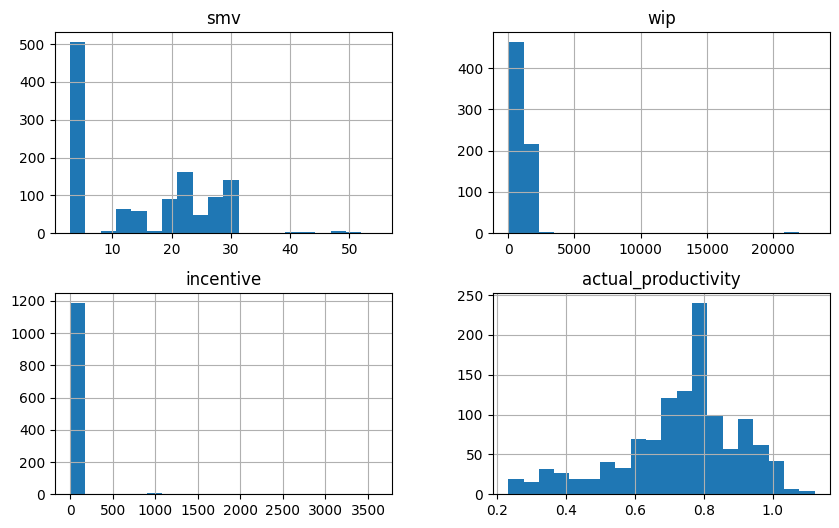

In [13]:
# Histograms
numerical_cols = ['smv', 'wip', 'incentive', 'actual_productivity']
data_cleaned[numerical_cols].hist(figsize= (10,6), bins=20)
plt.show()

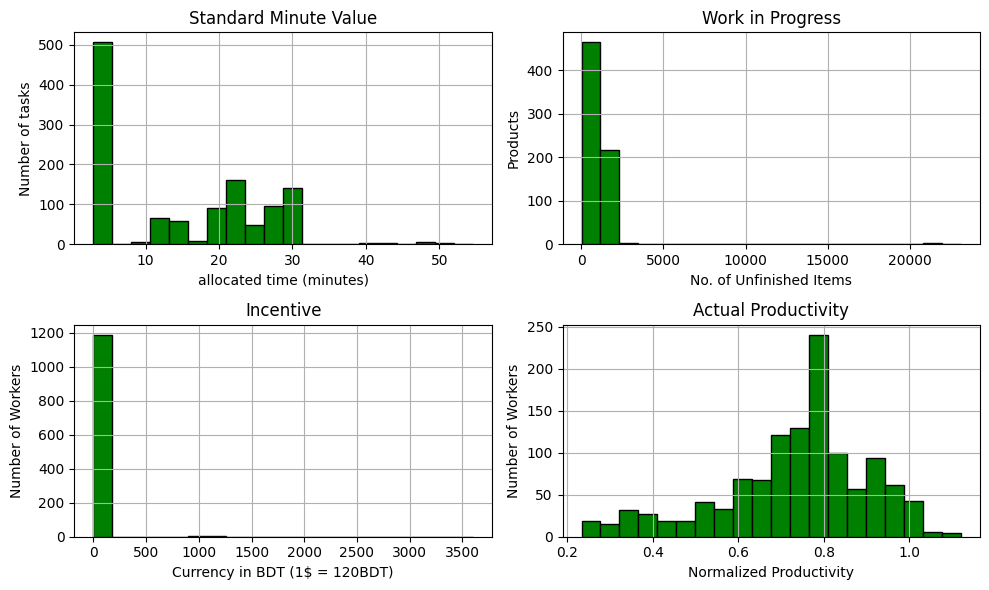

In [14]:
numerical_cols = ['smv', 'wip', 'incentive', 'actual_productivity']
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

titles = ['Standard Minute Value', 'Work in Progress', 'Incentive', 'Actual Productivity']
xlabels = ['allocated time (minutes)', 'No. of Unfinished Items', 'Currency in BDT (1$ = 120BDT)', 'Normalized Productivity']
ylabels = ['Number of tasks', 'Products', 'Number of Workers', 'Number of Workers']

for i, col in enumerate(numerical_cols):
    data_cleaned[col].hist(ax=axes[i], bins=20, color='green', edgecolor='black')
    axes[i].set_title(titles[i])      # Set individual title
    axes[i].set_xlabel(xlabels[i])    # Set individual x-label
    axes[i].set_ylabel(ylabels[i])    # Set individual y-label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


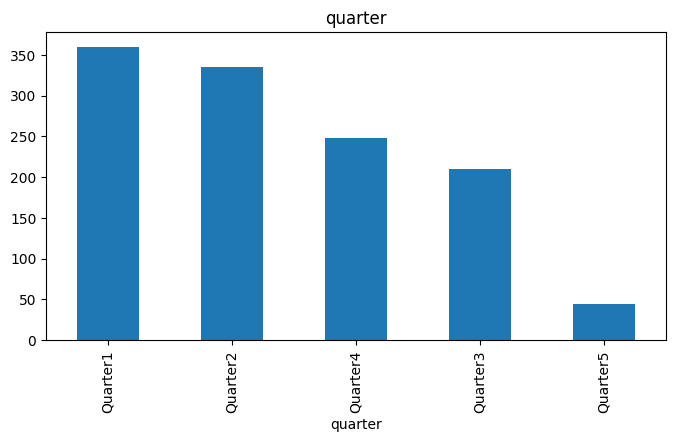

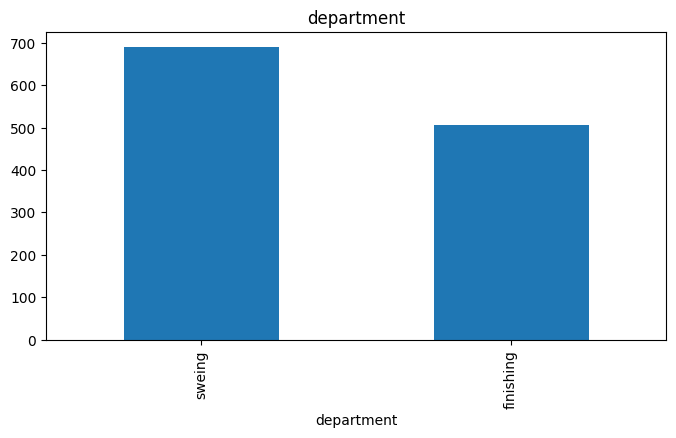

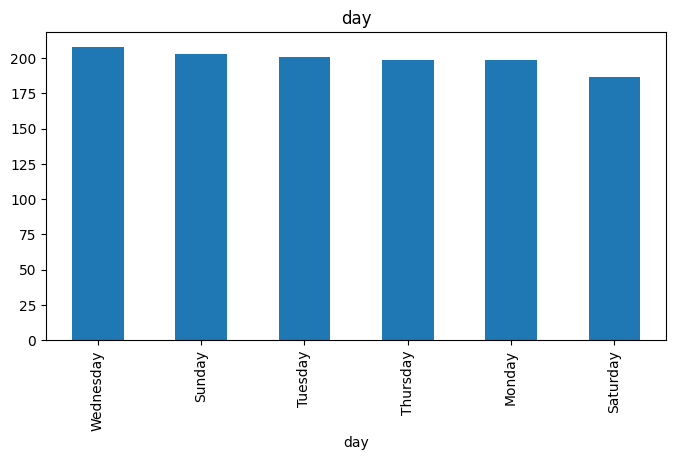

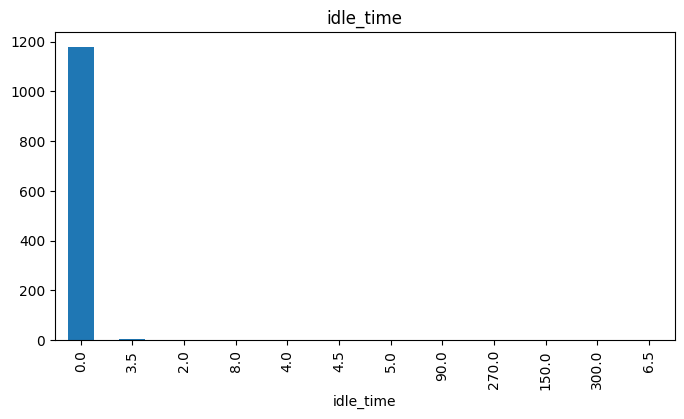

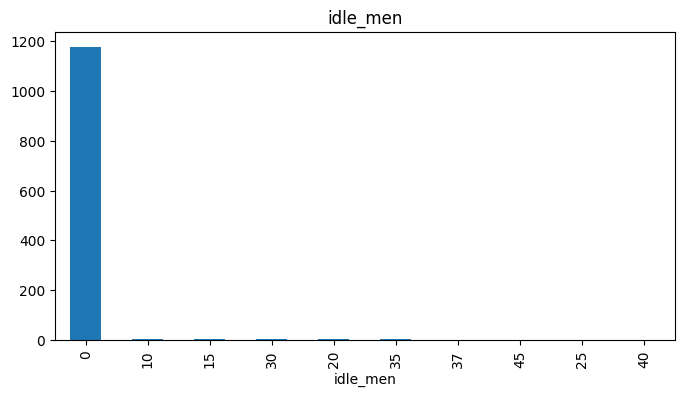

In [15]:
# Bar Graphs
categorical_cols = ['quarter', 'department', 'day', 'idle_time', 'idle_men']
for col in categorical_cols:
  data_cleaned[col].value_counts().plot(kind='bar', figsize=(8,4))
  plt.title(col)
  plt.show()

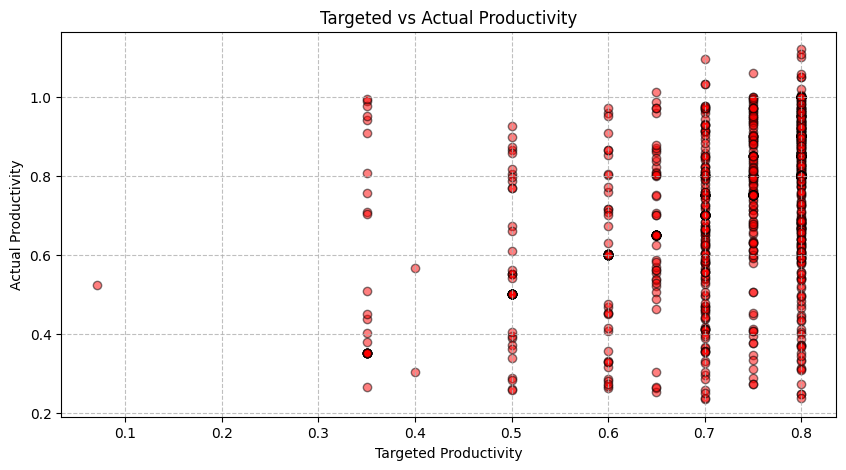

In [16]:

plt.figure(figsize=(10, 5))
plt.scatter(
    data_cleaned['targeted_productivity'],
    data_cleaned['actual_productivity'],
    color='red',
    alpha=0.5,
    edgecolor='black'
)
plt.title('Targeted vs Actual Productivity')  # Add a title
plt.xlabel('Targeted Productivity')           # Add x-axis label
plt.ylabel('Actual Productivity')             # Add y-axis label
plt.grid(True, linestyle='--', alpha=0.8)     # Optional: Add gridlines for better visualization
plt.show()


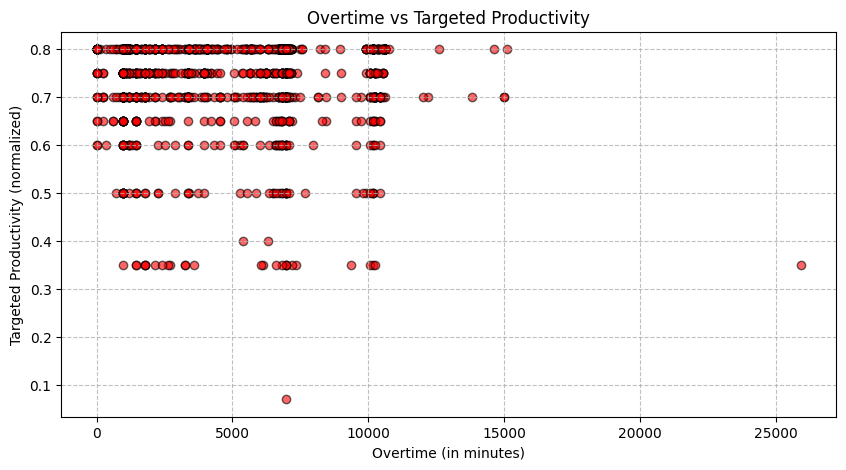

In [17]:
# Scatter Plot - 1
plt.figure(figsize=(10, 5))
plt.scatter(data_cleaned['over_time'], data_cleaned['targeted_productivity'], color='red', alpha=0.6, edgecolor='black')
plt.title('Overtime vs Targeted Productivity')
plt.xlabel('Overtime (in minutes)')
plt.ylabel('Targeted Productivity (normalized)')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

Text(0, 0.5, 'targeted_productivity')

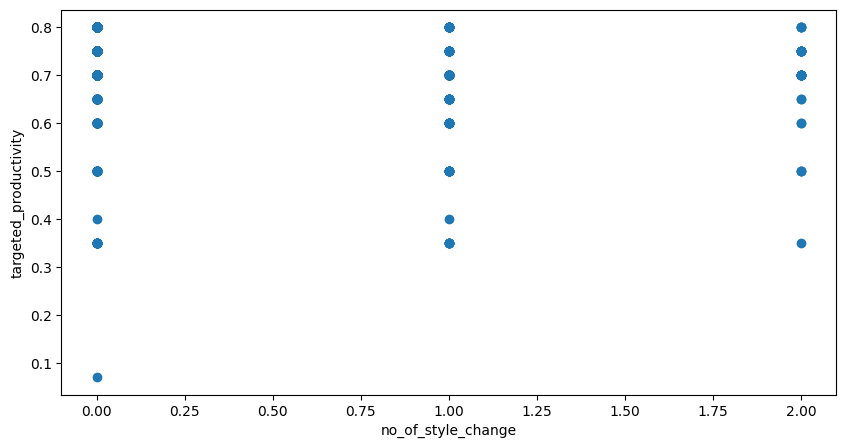

In [18]:
# Scatter Plot - 1
plt.figure(figsize=(10,5))
plt.scatter(data_cleaned['no_of_style_change'], data_cleaned['targeted_productivity'])
plt.xlabel('no_of_style_change')
plt.ylabel('targeted_productivity')

Text(0, 0.5, 'actual_productivity')

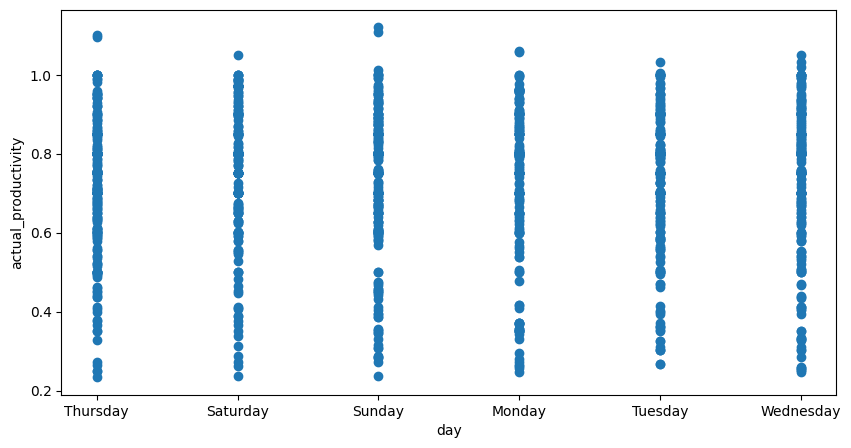

In [ ]:
# Scatter Plot - 1
plt.figure(figsize=(10,5))
plt.scatter(data_cleaned['day'], data_cleaned['actual_productivity'])
plt.xlabel('day')
plt.ylabel('actual_productivity')

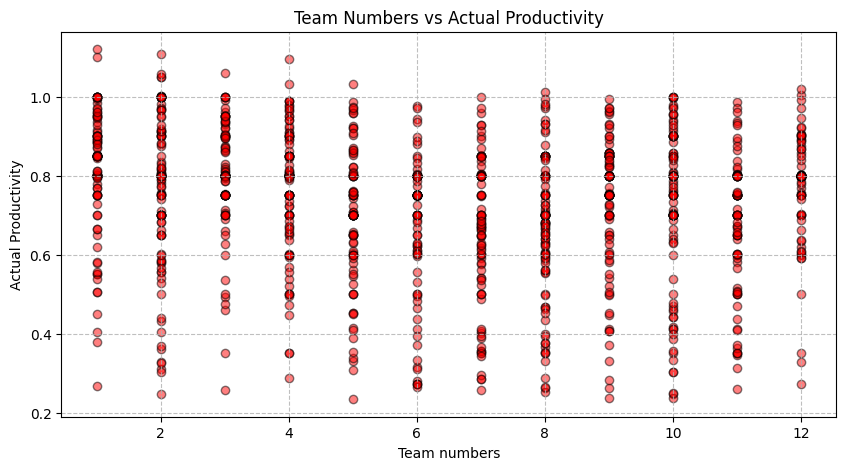

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(data_cleaned['team'], data_cleaned['actual_productivity'], color='red', alpha=0.5, edgecolor='black')
plt.title('Team Numbers vs Actual Productivity')
plt.xlabel('Team numbers')
plt.ylabel('Actual Productivity')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

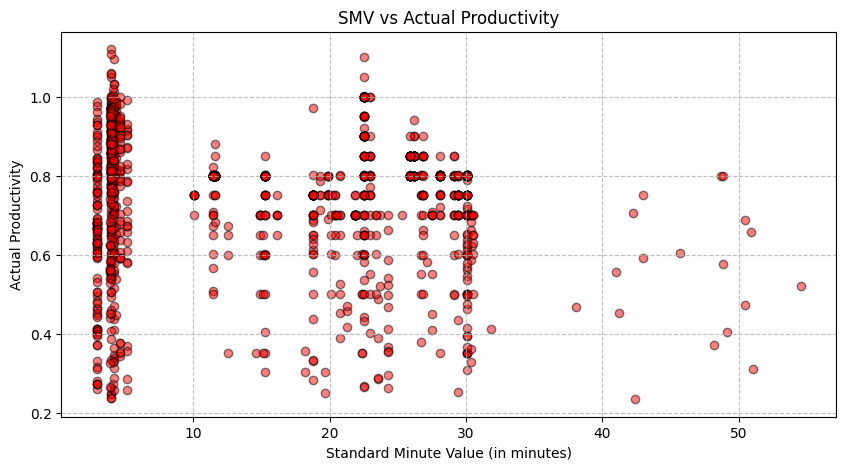

In [20]:
# Scatter Plot - 4
plt.figure(figsize=(10, 5))
plt.scatter(data_cleaned['smv'], data_cleaned['actual_productivity'], color='red', alpha=0.5, edgecolor='black')
plt.title('SMV vs Actual Productivity')
plt.xlabel('Standard Minute Value (in minutes)')
plt.ylabel('Actual Productivity')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

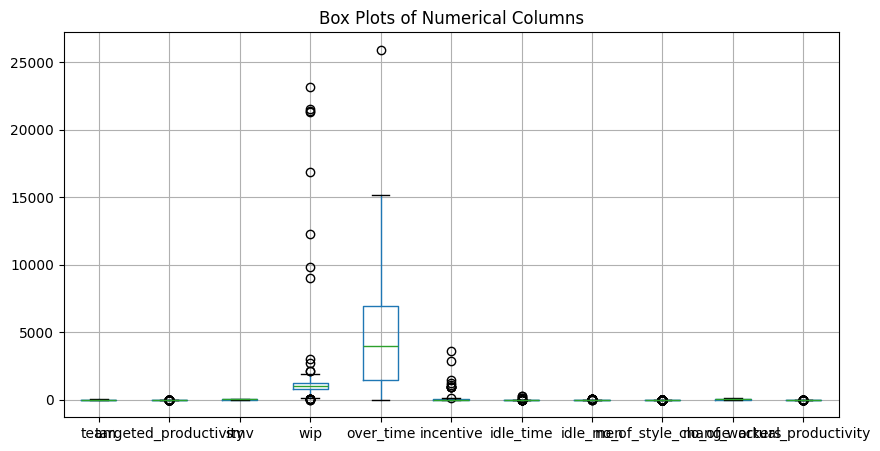

<Figure size 640x480 with 0 Axes>

In [21]:
# Box Plots
plt. figure(figsize= (10,5))
numerical_cols = ['smv', 'wip', 'over_time', 'incentive', 'no_of_style_change']
data_cleaned.boxplot()
plt.title('Box Plots of Numerical Columns')
plt.show()
plt.tight_layout() # Adjust the spacing between the x-axis titles
plt.show()

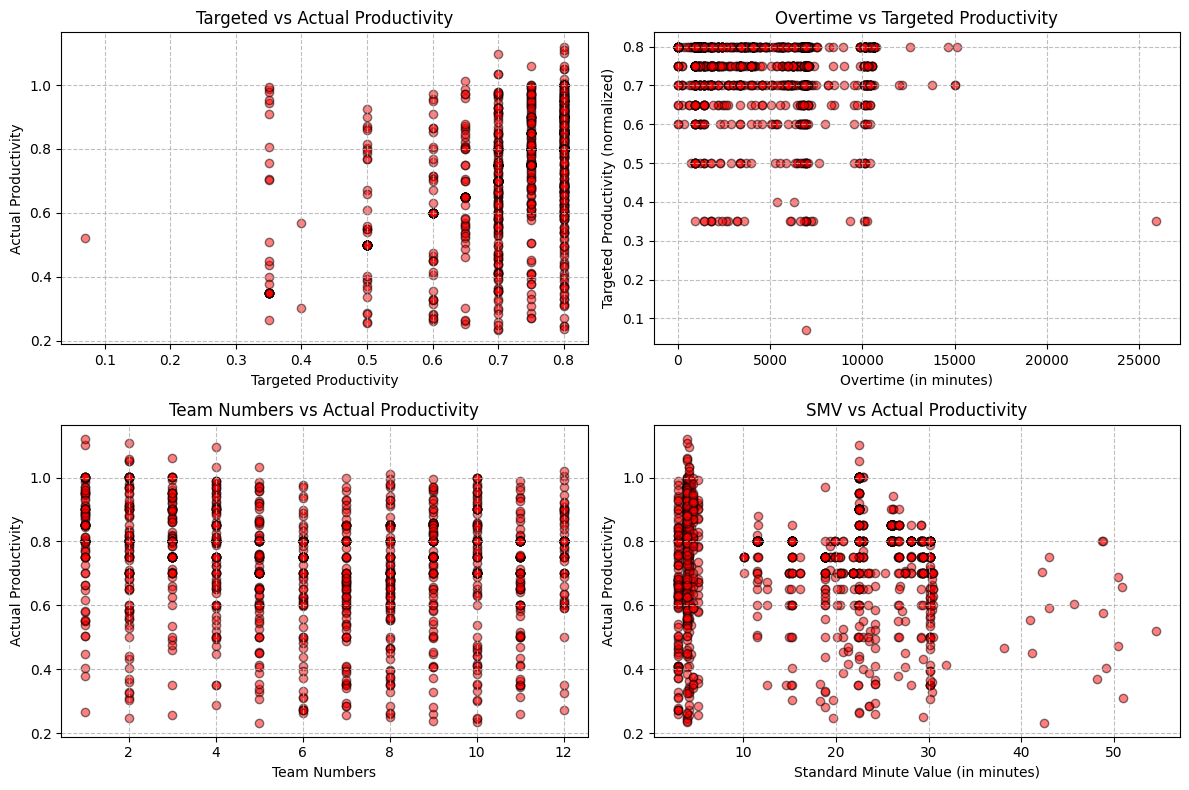

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Titles, x-labels, and y-labels for each subplot
titles = [
    'Targeted vs Actual Productivity',
    'Overtime vs Targeted Productivity',
    'Team Numbers vs Actual Productivity',
    'SMV vs Actual Productivity'
]

xlabels = [
    'Targeted Productivity',
    'Overtime (in minutes)',
    'Team Numbers',
    'Standard Minute Value (in minutes)'
]

ylabels = [
    'Actual Productivity',
    'Targeted Productivity (normalized)',
    'Actual Productivity',
    'Actual Productivity'
]

# Scatter plot data
scatter_data = [
    ('targeted_productivity', 'actual_productivity'),
    ('over_time', 'targeted_productivity'),
    ('team', 'actual_productivity'),
    ('smv', 'actual_productivity')
]

for i, (x_col, y_col) in enumerate(scatter_data):
    axes[i].scatter(
        data_cleaned[x_col],
        data_cleaned[y_col],
        color='red',
        alpha=0.5,
        edgecolor='black'
    )
    axes[i].set_title(titles[i])      # Set individual title
    axes[i].set_xlabel(xlabels[i])    # Set individual x-label
    axes[i].set_ylabel(ylabels[i])    # Set individual y-label
    axes[i].grid(True, linestyle='--', alpha=0.8)  # Add gridlines

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
